<a href="https://colab.research.google.com/github/skandanyal/Machine-Learning-course/blob/main/Projects/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

## Importing standard libraries and dataset

In [ ]:
# mentioning all the imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# importing the dataset

df = pd.read_csv("/content/drive/MyDrive/dataSet/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
features = '''
1. age
2. sex - gender
3. cp - chest pain type (4 values)
4. trestbpm - resting blood pressure (in mm Hg)
5. chol - serum cholestoral (in mg/dl)
6. fbs - fasting blood sugar > 120 mg/dl
7. restecg - resting electrocardiographic results (values 0,1,2)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target - sur
'''

## Data Cleaning

Removing any NaN values in the dataset.

In [ ]:
# let us look at the features and their datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


There are no null values in the dataset - one less checkbox to worry about!

In [ ]:
# let us look at the central tendencies of the features in the dataset

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# segregating numerical and categorical data

df_num = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]                          # use histogram
df_cat = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]            # value count

In [ ]:
df_num.head()

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


In [ ]:
df_cat.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,0,0,1,0,2,2,3
1,1,0,1,0,1,0,0,3
2,1,0,0,1,1,0,0,3
3,1,0,0,1,0,2,1,3
4,0,0,1,1,0,1,3,2


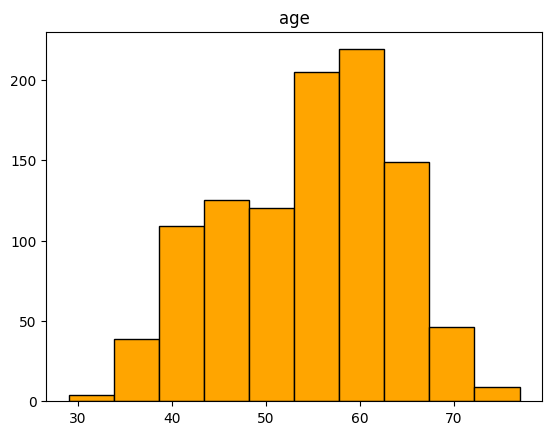

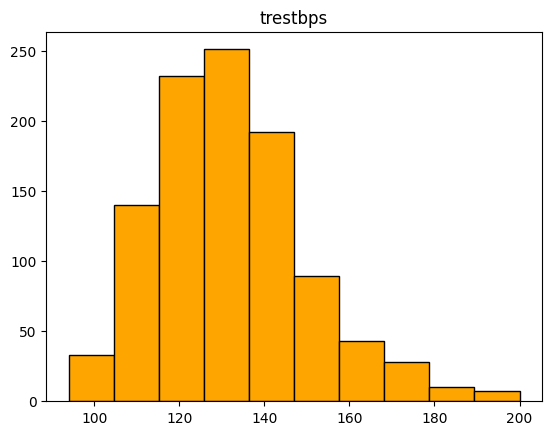

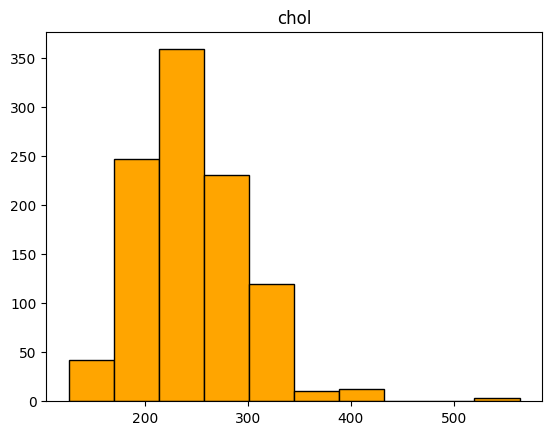

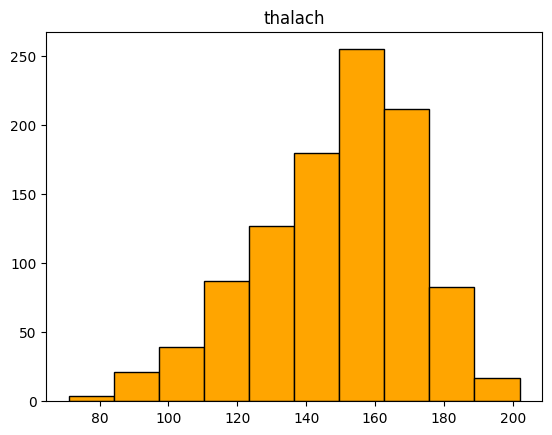

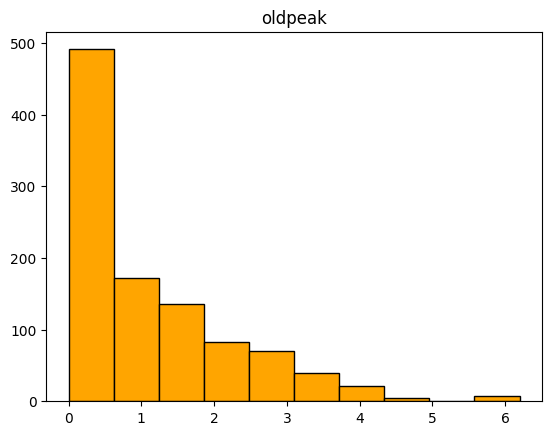

In [ ]:
# histograms of all numerical values

for cat in df_num.columns:
    plt.hist(df_num[cat], color='orange', edgecolor='black', )
    plt.title(cat)
    plt.show()

We see that the `oldpeak` data does not resembe a normal data. Hence, transform it by applying lograthmic function.

In [ ]:
# applying log function to oldpeak

df['log_oldpeak'] = np.log(df['oldpeak'] + 1)

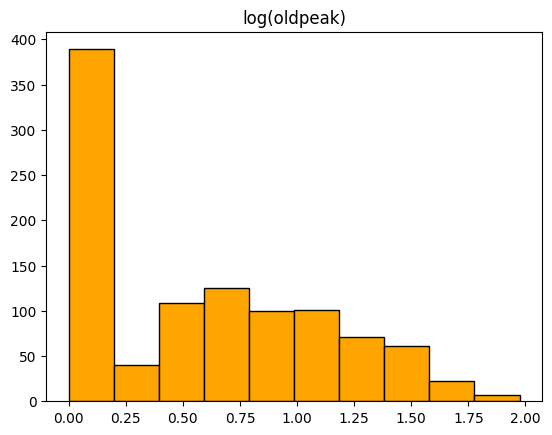

In [ ]:
# let us look at the histogram of the transformed metric

plt.hist(df['log_oldpeak'], color='orange', edgecolor='black')
plt.title('log(oldpeak)')
plt.show()

The data still does not conform to a bell shape. Let us try a much stricter transformation like `Yeo-Jhonson`.

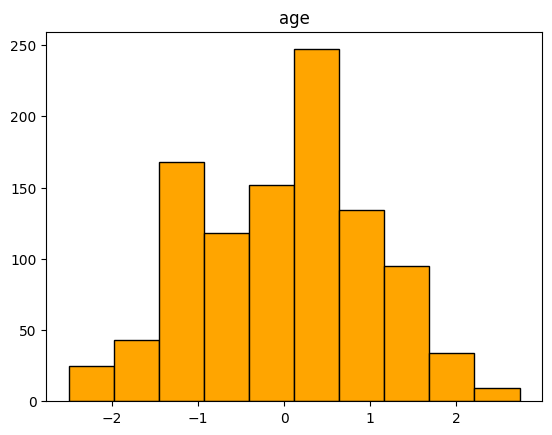

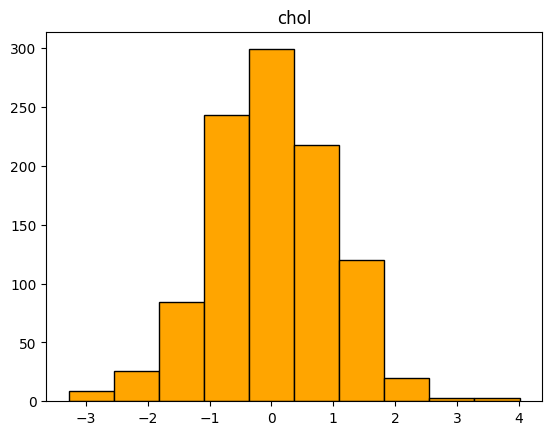

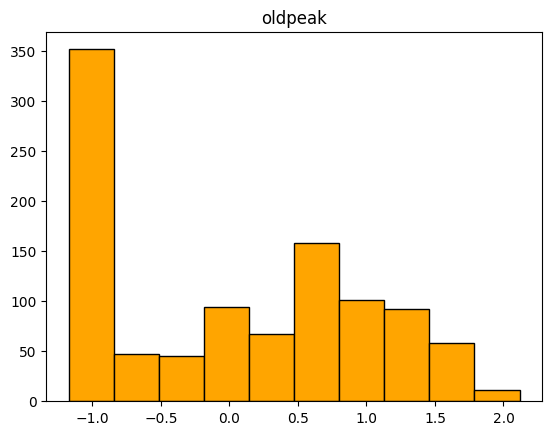

In [ ]:
# let us also tranfsorm age and chol along with oldpeak

from sklearn.preprocessing import PowerTransformer

cols = ['age', 'chol', 'oldpeak']
pt = PowerTransformer(method='yeo-johnson')
df_transformed = pd.DataFrame(pt.fit_transform(df[cols]), columns=cols)

for cat in df_transformed.columns:
    plt.hist(df_transformed[cat], color='orange', edgecolor='black')
    plt.title(cat)
    plt.show()

The applied transformation still could not fix `oldpeak`. We shall now use that regardless.

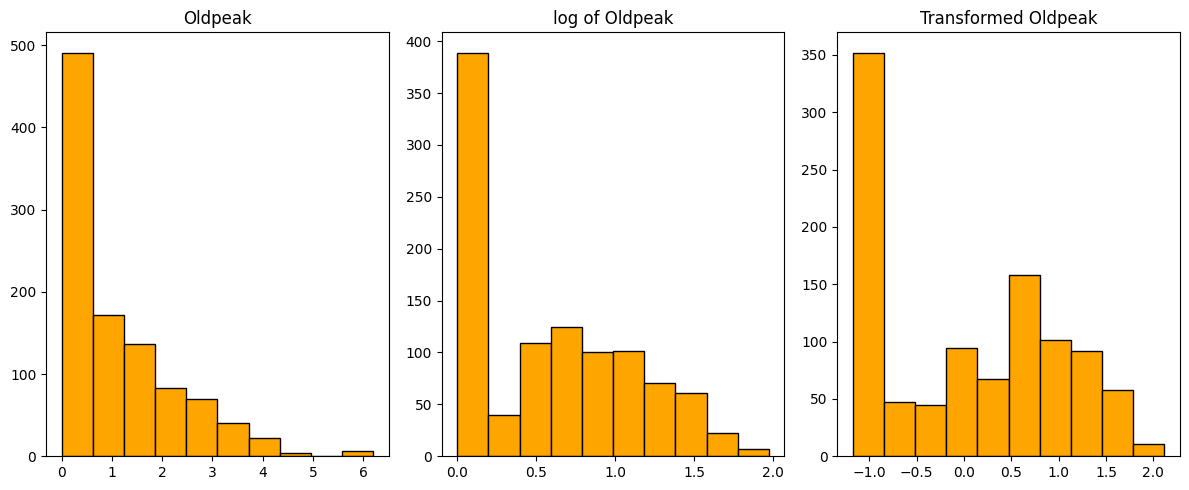

In [ ]:
# comparing the original oldpeak, log_oldpeak and transformed oldpeak side by side

fix, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,5))

ax1.hist(df['oldpeak'], color='orange', edgecolor='black')
ax1.set(title='Oldpeak')

ax2.hist(df['log_oldpeak'], color='orange', edgecolor='black')
ax2.set(title='log of Oldpeak')

ax3.hist(df_transformed['oldpeak'], color='orange', edgecolor='black')
ax3.set(title='Transformed Oldpeak')

plt.tight_layout()
plt.show()

               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.271121  0.219823 -0.390227  0.208137
trestbps  0.271121  1.000000  0.127977 -0.039264  0.187434
chol      0.219823  0.127977  1.000000 -0.021772  0.064880
thalach  -0.390227 -0.039264 -0.021772  1.000000 -0.349796
oldpeak   0.208137  0.187434  0.064880 -0.349796  1.000000


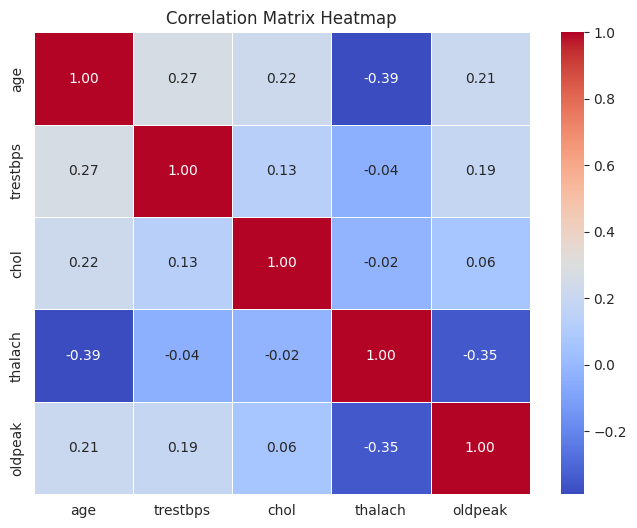

In [ ]:
# check for correlation matrix

# calculating correlation matrix
corr_matrix = df_num.corr(numeric_only=True)
print(corr_matrix)  # View correlation values

# Set the background style to white
sns.set_style('white')
sns.palette='viridis'

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

The numerical data aren't highly correlated - fit to train models.

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'log_oldpeak'],
      dtype='object')

In [ ]:
df['oldpeak'] = df['log_oldpeak'].copy()
df.drop('log_oldpeak', axis=1, inplace=True)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Now to the Machine Learning bit -

In [ ]:
# we will oneHotEncode all categorical data in the main df

df_cat.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')

In [ ]:
col_names = df.columns
col_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
y = df['target']
X = df.drop('target', axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
transformer = ColumnTransformer([
    ('one_hot_encoding', one_hot, df_cat.columns)],
     remainder='passthrough'
)

transformed_X = transformer.fit_transform(X)
# transformed_X[:5]

In [ ]:
print(transformed_X[:5])

[[  0.           1.           1.           0.           0.
    0.           1.           0.           0.           1.
    0.           1.           0.           0.           0.
    1.           0.           0.           1.           0.
    0.           0.           0.           0.           1.
   52.         125.         212.         168.           0.69314718]
 [  0.           1.           1.           0.           0.
    0.           0.           1.           1.           0.
    0.           0.           1.           1.           0.
    0.           1.           0.           0.           0.
    0.           0.           0.           0.           1.
   53.         140.         203.         155.           1.41098697]
 [  0.           1.           1.           0.           0.
    0.           1.           0.           0.           1.
    0.           0.           1.           1.           0.
    0.           1.           0.           0.           0.
    0.           0.           0.      

In [ ]:
# get column names
encoded_cat_cols = transformer.named_transformers_['one_hot_encoding'].get_feature_names_out(df_cat.columns)
num_cols = [col for col in X.columns if col not in df_cat.columns]
all_cols = list(encoded_cat_cols) + num_cols

# wrap in DataFrame
X_t = pd.DataFrame(transformed_X, columns=all_cols)

In [ ]:
X_t.head()

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,52.0,125.0,212.0,168.0,0.693147
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,53.0,140.0,203.0,155.0,1.410987
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,70.0,145.0,174.0,125.0,1.280934
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,61.0,148.0,203.0,161.0,0.000000
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,62.0,138.0,294.0,106.0,1.064711


In [ ]:
print(X_t.columns)

Index(['sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'age', 'trestbps', 'chol', 'thalach',
       'oldpeak'],
      dtype='object')


## Scoring multiple models at once using cross validation scoring

In [ ]:
# using cross validation for quicker testing of accuracy of different models

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

models = {
    'RandomForest': RandomForestClassifier(n_jobs=5),
    'LinearSVC': LinearSVC(),
    'GradientBoostingClaf': HistGradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(random_state=5, n_jobs=-1),
    'KNN': KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
}


for name, model in models.items():
    scores = cross_val_score(estimator=model, X=X_t, y=y, scoring='accuracy', cv=5, n_jobs=5)
    print(f"{name} -> Mean accuracy: {np.mean(scores):.4f}")

RandomForest -> Mean accuracy: 0.9971
LinearSVC -> Mean accuracy: 0.8605
GradientBoostingClaf -> Mean accuracy: 0.9941
LogisticRegression -> Mean accuracy: 0.8527
KNN -> Mean accuracy: 0.7171


## Conclusion:
We observe that the tree based models are very well fit to be used with this dataset, with having accuracy of more than 99%. Linear models follow next with roughly 86% accuracy. This can be further improved with much more transformations. In contrast, K-Nearest Neighbors (KNN) lags behind, reaching only 72% accuracy, suggesting it may not be the optimal choice for this problem.
